In [1]:
import torch
import data
import tqdm
import models
import numpy as np
from torchvision.transforms import v2
from PIL import Image
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
EPOCHS = 200
BATCH_SIZE = 10
LR = 5e-6
NOISE_STD = 0.4

In [3]:
def show_random_image(dataset, model, length):
    i = np.random.randint(low=0,high=length)
    LR, trueHR = dataset[i]
    LR = LR+noise(LR.shape)
    t1 = torch.tensor(LR.view(1,1,75,75))
    t2 = model(t1.float().to(device)).cpu().detach()
    image1 = Image.fromarray(t1.numpy()[0][0]*255)
    image2 = Image.fromarray(t2.numpy()[0][0]*255)
    image3 = Image.fromarray(trueHR.numpy()[0]*255)
    return image1, image2, image3

def noise(shape,deviation=NOISE_STD):
    return torch.randn(shape)*deviation

In [4]:
dataset = data.LensingDataset('../dataset_1/','vanilla')
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [0.9, 0.1])
train_dataloader = torch.utils.data.DataLoader(train_dataset,shuffle=True,batch_size=BATCH_SIZE,num_workers=15)
val_dataloader = torch.utils.data.DataLoader(val_dataset,shuffle=True,batch_size=BATCH_SIZE,num_workers=15)

In [5]:
model = models.Resnet_SISR(residual_depth=10, 
                           in_channels=1, 
                           maginfication=1, 
                           num_magnifications=0, 
                           latent_channel_count=64).to(device)
loss_fn = torch.nn.MSELoss()
opt = torch.optim.Adam(params=model.parameters(),lr=LR)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt,'min',patience=2,factor=0.1)

In [6]:
images = []
history = {'val_loss':[], 'loss':[]}
best_val_loss = np.inf
best_weights = None
for epoch in range(EPOCHS):
    losses = []
    model.train()
    for i,(x,_) in enumerate(tqdm.tqdm(train_dataloader, desc=f"Training epoch {epoch+1}")):
        (x, y) = ((x.float()+noise(x.shape)).to(device), x.float().to(device))
        x = model(x)
        loss = loss_fn(x,y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(float(loss))
    print(f"Training at epoch {epoch+1}/{EPOCHS}: {np.mean(losses)} at LR={opt.param_groups[0]['lr']}")
    history['loss'].append(np.mean(losses))
    train_loss = np.mean(losses)
    model.eval()
    losses = []
    for i,(x,_) in enumerate(tqdm.tqdm(val_dataloader, desc=f"Validation epoch {epoch}")):
        (x, y) = ((x.float()+noise(x.shape)).to(device), x.float().to(device))
        x = model(x)
        val_loss = loss_fn(x,y)
        losses.append(float(val_loss))
    if best_val_loss > np.mean(losses):
        best_val_loss = np.mean(losses)
        best_weights = model.state_dict()
    history['val_loss'].append(np.mean(losses))
    print(f"Validation at epoch {epoch+1}/{EPOCHS}: {np.mean(losses)} at LR={opt.param_groups[0]['lr']}")

Training epoch 1: 100%|██████████| 90/90 [00:13<00:00,  6.45it/s]


Training at epoch 1/200: 0.06161872905989488 at LR=5e-06


Validation epoch 0: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Validation at epoch 1/200: 0.02915942221879959 at LR=5e-06


Training epoch 2: 100%|██████████| 90/90 [00:12<00:00,  7.48it/s]


Training at epoch 2/200: 0.011813296677751673 at LR=5e-06


Validation epoch 1: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 2/200: 0.009022600948810577 at LR=5e-06


Training epoch 3: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 3/200: 0.006748717319634226 at LR=5e-06


Validation epoch 2: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 3/200: 0.005837015295401216 at LR=5e-06


Training epoch 4: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 4/200: 0.0050780289961646 at LR=5e-06


Validation epoch 3: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 4/200: 0.004623783705756068 at LR=5e-06


Training epoch 5: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 5/200: 0.004239109142993887 at LR=5e-06


Validation epoch 4: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 5/200: 0.003896716865710914 at LR=5e-06


Training epoch 6: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 6/200: 0.00374490589213868 at LR=5e-06


Validation epoch 5: 100%|██████████| 10/10 [00:01<00:00,  6.73it/s]


Validation at epoch 6/200: 0.0036937918281182646 at LR=5e-06


Training epoch 7: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 7/200: 0.0033730510001381236 at LR=5e-06


Validation epoch 6: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 7/200: 0.0032140322029590605 at LR=5e-06


Training epoch 8: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 8/200: 0.0031129045360204248 at LR=5e-06


Validation epoch 7: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 8/200: 0.0030634960625320674 at LR=5e-06


Training epoch 9: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 9/200: 0.002934368182387617 at LR=5e-06


Validation epoch 8: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Validation at epoch 9/200: 0.002833114587701857 at LR=5e-06


Training epoch 10: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 10/200: 0.0027974632568657396 at LR=5e-06


Validation epoch 9: 100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Validation at epoch 10/200: 0.002580031892284751 at LR=5e-06


Training epoch 11: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 11/200: 0.002645525985604359 at LR=5e-06


Validation epoch 10: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 11/200: 0.002510940423235297 at LR=5e-06


Training epoch 12: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 12/200: 0.002528432795467476 at LR=5e-06


Validation epoch 11: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 12/200: 0.002454814221709967 at LR=5e-06


Training epoch 13: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 13/200: 0.002459848666977551 at LR=5e-06


Validation epoch 12: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 13/200: 0.0023429712280631067 at LR=5e-06


Training epoch 14: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 14/200: 0.00236910589867168 at LR=5e-06


Validation epoch 13: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 14/200: 0.0022116980981081724 at LR=5e-06


Training epoch 15: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 15/200: 0.0022819995905997027 at LR=5e-06


Validation epoch 14: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 15/200: 0.0022026578430086375 at LR=5e-06


Training epoch 16: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 16/200: 0.002234312325405578 at LR=5e-06


Validation epoch 15: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 16/200: 0.0021406841464340688 at LR=5e-06


Training epoch 17: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 17/200: 0.0021857220123315023 at LR=5e-06


Validation epoch 16: 100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Validation at epoch 17/200: 0.0021237048087641595 at LR=5e-06


Training epoch 18: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 18/200: 0.0021301853651594783 at LR=5e-06


Validation epoch 17: 100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Validation at epoch 18/200: 0.002043065894395113 at LR=5e-06


Training epoch 19: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 19/200: 0.0020954770734533668 at LR=5e-06


Validation epoch 18: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 19/200: 0.002006405161228031 at LR=5e-06


Training epoch 20: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 20/200: 0.002051608269620273 at LR=5e-06


Validation epoch 19: 100%|██████████| 10/10 [00:01<00:00,  6.50it/s]


Validation at epoch 20/200: 0.0019679158576764166 at LR=5e-06


Training epoch 21: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 21/200: 0.002006452529328979 at LR=5e-06


Validation epoch 20: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 21/200: 0.0019418276962824166 at LR=5e-06


Training epoch 22: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 22/200: 0.0019793457506845397 at LR=5e-06


Validation epoch 21: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 22/200: 0.0019121866673231125 at LR=5e-06


Training epoch 23: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 23/200: 0.0019390731416125265 at LR=5e-06


Validation epoch 22: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 23/200: 0.0018823617021553219 at LR=5e-06


Training epoch 24: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 24/200: 0.0019316397555586365 at LR=5e-06


Validation epoch 23: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 24/200: 0.0018648312310688198 at LR=5e-06


Training epoch 25: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 25/200: 0.001867566014536553 at LR=5e-06


Validation epoch 24: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 25/200: 0.0019235642626881599 at LR=5e-06


Training epoch 26: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 26/200: 0.0018444865230574376 at LR=5e-06


Validation epoch 25: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 26/200: 0.0018238178687170147 at LR=5e-06


Training epoch 27: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 27/200: 0.0018308536654027799 at LR=5e-06


Validation epoch 26: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 27/200: 0.0018164286972023546 at LR=5e-06


Training epoch 28: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 28/200: 0.0018252614717413154 at LR=5e-06


Validation epoch 27: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 28/200: 0.0018057862995192408 at LR=5e-06


Training epoch 29: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 29/200: 0.0018115917414737244 at LR=5e-06


Validation epoch 28: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 29/200: 0.0017533616162836551 at LR=5e-06


Training epoch 30: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 30/200: 0.001794368266645405 at LR=5e-06


Validation epoch 29: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 30/200: 0.0017328413319773971 at LR=5e-06


Training epoch 31: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 31/200: 0.001761046167100883 at LR=5e-06


Validation epoch 30: 100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Validation at epoch 31/200: 0.001711803290527314 at LR=5e-06


Training epoch 32: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 32/200: 0.0017432018312522107 at LR=5e-06


Validation epoch 31: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 32/200: 0.001626000599935651 at LR=5e-06


Training epoch 33: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 33/200: 0.001730853764133321 at LR=5e-06


Validation epoch 32: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 33/200: 0.0016567016951739787 at LR=5e-06


Training epoch 34: 100%|██████████| 90/90 [00:12<00:00,  7.48it/s]


Training at epoch 34/200: 0.0017050573654058907 at LR=5e-06


Validation epoch 33: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Validation at epoch 34/200: 0.0016736865625716745 at LR=5e-06


Training epoch 35: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 35/200: 0.0016984372115176585 at LR=5e-06


Validation epoch 34: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 35/200: 0.001689227612223476 at LR=5e-06


Training epoch 36: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 36/200: 0.001674509219204386 at LR=5e-06


Validation epoch 35: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 36/200: 0.001601767330430448 at LR=5e-06


Training epoch 37: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 37/200: 0.0016607872249248127 at LR=5e-06


Validation epoch 36: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 37/200: 0.0016025484772399067 at LR=5e-06


Training epoch 38: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 38/200: 0.0016512313495493597 at LR=5e-06


Validation epoch 37: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 38/200: 0.001605464133899659 at LR=5e-06


Training epoch 39: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 39/200: 0.0016211258208689591 at LR=5e-06


Validation epoch 38: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 39/200: 0.0015780943911522626 at LR=5e-06


Training epoch 40: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 40/200: 0.0016374065851171812 at LR=5e-06


Validation epoch 39: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 40/200: 0.0016653186175972223 at LR=5e-06


Training epoch 41: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 41/200: 0.0016310998070467677 at LR=5e-06


Validation epoch 40: 100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Validation at epoch 41/200: 0.001562188274692744 at LR=5e-06


Training epoch 42: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 42/200: 0.0015916724766915043 at LR=5e-06


Validation epoch 41: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 42/200: 0.0015834940248169004 at LR=5e-06


Training epoch 43: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 43/200: 0.0015962397278700437 at LR=5e-06


Validation epoch 42: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 43/200: 0.0015470682294107974 at LR=5e-06


Training epoch 44: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 44/200: 0.0015777247479288941 at LR=5e-06


Validation epoch 43: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 44/200: 0.001526314753573388 at LR=5e-06


Training epoch 45: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 45/200: 0.0015553374942909512 at LR=5e-06


Validation epoch 44: 100%|██████████| 10/10 [00:01<00:00,  6.75it/s]


Validation at epoch 45/200: 0.0015218573273159564 at LR=5e-06


Training epoch 46: 100%|██████████| 90/90 [00:12<00:00,  7.48it/s]


Training at epoch 46/200: 0.0015517731248918508 at LR=5e-06


Validation epoch 45: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 46/200: 0.0015514698578044772 at LR=5e-06


Training epoch 47: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 47/200: 0.0015492981830094424 at LR=5e-06


Validation epoch 46: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 47/200: 0.0014700180385261775 at LR=5e-06


Training epoch 48: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 48/200: 0.0015361209128362436 at LR=5e-06


Validation epoch 47: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 48/200: 0.0015161564573645593 at LR=5e-06


Training epoch 49: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 49/200: 0.001510948172977401 at LR=5e-06


Validation epoch 48: 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Validation at epoch 49/200: 0.0014994727331213652 at LR=5e-06


Training epoch 50: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 50/200: 0.0015045950499673684 at LR=5e-06


Validation epoch 49: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 50/200: 0.0014636304462328554 at LR=5e-06


Training epoch 51: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 51/200: 0.0015040612249221238 at LR=5e-06


Validation epoch 50: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 51/200: 0.001434435648843646 at LR=5e-06


Training epoch 52: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 52/200: 0.0015042106970213354 at LR=5e-06


Validation epoch 51: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 52/200: 0.001403922773897648 at LR=5e-06


Training epoch 53: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 53/200: 0.0014914176995969482 at LR=5e-06


Validation epoch 52: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 53/200: 0.0014325631665997208 at LR=5e-06


Training epoch 54: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 54/200: 0.0014802380309750637 at LR=5e-06


Validation epoch 53: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 54/200: 0.001457105902954936 at LR=5e-06


Training epoch 55: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 55/200: 0.0014678696493825151 at LR=5e-06


Validation epoch 54: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 55/200: 0.0013686098158359528 at LR=5e-06


Training epoch 56: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 56/200: 0.0014614968948687115 at LR=5e-06


Validation epoch 55: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 56/200: 0.0014453986543230713 at LR=5e-06


Training epoch 57: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 57/200: 0.0014369986796130736 at LR=5e-06


Validation epoch 56: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 57/200: 0.0013963302946649492 at LR=5e-06


Training epoch 58: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 58/200: 0.0014216129668056965 at LR=5e-06


Validation epoch 57: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 58/200: 0.0014146381756290794 at LR=5e-06


Training epoch 59: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 59/200: 0.0014206116346435415 at LR=5e-06


Validation epoch 58: 100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Validation at epoch 59/200: 0.001387567026540637 at LR=5e-06


Training epoch 60: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 60/200: 0.0014284123860610028 at LR=5e-06


Validation epoch 59: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 60/200: 0.0013739638030529021 at LR=5e-06


Training epoch 61: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 61/200: 0.0014083766844123601 at LR=5e-06


Validation epoch 60: 100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Validation at epoch 61/200: 0.0013820666703395546 at LR=5e-06


Training epoch 62: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 62/200: 0.0014152925435660614 at LR=5e-06


Validation epoch 61: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 62/200: 0.0013508804491721093 at LR=5e-06


Training epoch 63: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 63/200: 0.001396596232532627 at LR=5e-06


Validation epoch 62: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 63/200: 0.001409440755378455 at LR=5e-06


Training epoch 64: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 64/200: 0.0013913414880840315 at LR=5e-06


Validation epoch 63: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 64/200: 0.001332500681746751 at LR=5e-06


Training epoch 65: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 65/200: 0.001387550954758707 at LR=5e-06


Validation epoch 64: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 65/200: 0.0013299665763042868 at LR=5e-06


Training epoch 66: 100%|██████████| 90/90 [00:12<00:00,  7.48it/s]


Training at epoch 66/200: 0.001374814753782832 at LR=5e-06


Validation epoch 65: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 66/200: 0.0012960660504177212 at LR=5e-06


Training epoch 67: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 67/200: 0.0013545688720316522 at LR=5e-06


Validation epoch 66: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 67/200: 0.0013303745188750326 at LR=5e-06


Training epoch 68: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 68/200: 0.0013775417878706421 at LR=5e-06


Validation epoch 67: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 68/200: 0.00140737509354949 at LR=5e-06


Training epoch 69: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 69/200: 0.00133443997733088 at LR=5e-06


Validation epoch 68: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 69/200: 0.0013343331753276288 at LR=5e-06


Training epoch 70: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 70/200: 0.001352906935951776 at LR=5e-06


Validation epoch 69: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 70/200: 0.0013170862453989684 at LR=5e-06


Training epoch 71: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 71/200: 0.0013691511328539087 at LR=5e-06


Validation epoch 70: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 71/200: 0.0013023111852817238 at LR=5e-06


Training epoch 72: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 72/200: 0.001321244541193462 at LR=5e-06


Validation epoch 71: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 72/200: 0.0013407116173766553 at LR=5e-06


Training epoch 73: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 73/200: 0.0013255700637172494 at LR=5e-06


Validation epoch 72: 100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Validation at epoch 73/200: 0.001293619640637189 at LR=5e-06


Training epoch 74: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 74/200: 0.0013283834702128338 at LR=5e-06


Validation epoch 73: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 74/200: 0.0013754056883044541 at LR=5e-06


Training epoch 75: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 75/200: 0.0012993064308021631 at LR=5e-06


Validation epoch 74: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 75/200: 0.0012796989060007036 at LR=5e-06


Training epoch 76: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 76/200: 0.0013149485483558642 at LR=5e-06


Validation epoch 75: 100%|██████████| 10/10 [00:01<00:00,  6.52it/s]


Validation at epoch 76/200: 0.001280865306034684 at LR=5e-06


Training epoch 77: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 77/200: 0.0013027707865047786 at LR=5e-06


Validation epoch 76: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 77/200: 0.0013854985008947551 at LR=5e-06


Training epoch 78: 100%|██████████| 90/90 [00:12<00:00,  7.41it/s]


Training at epoch 78/200: 0.0012931866907618112 at LR=5e-06


Validation epoch 77: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 78/200: 0.0012473369482904673 at LR=5e-06


Training epoch 79: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 79/200: 0.0012823608587495983 at LR=5e-06


Validation epoch 78: 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Validation at epoch 79/200: 0.0013266450841911137 at LR=5e-06


Training epoch 80: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 80/200: 0.0012881772372768158 at LR=5e-06


Validation epoch 79: 100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Validation at epoch 80/200: 0.0012530843843705953 at LR=5e-06


Training epoch 81: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 81/200: 0.0012805345623443523 at LR=5e-06


Validation epoch 80: 100%|██████████| 10/10 [00:01<00:00,  6.32it/s]


Validation at epoch 81/200: 0.0012647546594962479 at LR=5e-06


Training epoch 82: 100%|██████████| 90/90 [00:12<00:00,  7.41it/s]


Training at epoch 82/200: 0.001278177225807061 at LR=5e-06


Validation epoch 81: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 82/200: 0.0012573559884913265 at LR=5e-06


Training epoch 83: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 83/200: 0.001268812756623245 at LR=5e-06


Validation epoch 82: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 83/200: 0.001211444626096636 at LR=5e-06


Training epoch 84: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 84/200: 0.001256436651520845 at LR=5e-06


Validation epoch 83: 100%|██████████| 10/10 [00:01<00:00,  6.52it/s]


Validation at epoch 84/200: 0.0012318264110945166 at LR=5e-06


Training epoch 85: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 85/200: 0.0012570168499627876 at LR=5e-06


Validation epoch 84: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 85/200: 0.0012286942801438272 at LR=5e-06


Training epoch 86: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 86/200: 0.0012391205075093443 at LR=5e-06


Validation epoch 85: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 86/200: 0.0012011096579954029 at LR=5e-06


Training epoch 87: 100%|██████████| 90/90 [00:12<00:00,  7.48it/s]


Training at epoch 87/200: 0.0012484701984148059 at LR=5e-06


Validation epoch 86: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 87/200: 0.0012046200456097722 at LR=5e-06


Training epoch 88: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 88/200: 0.0012266288136339022 at LR=5e-06


Validation epoch 87: 100%|██████████| 10/10 [00:01<00:00,  6.42it/s]


Validation at epoch 88/200: 0.0011499024694785476 at LR=5e-06


Training epoch 89: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 89/200: 0.0012429683145860004 at LR=5e-06


Validation epoch 88: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 89/200: 0.00125414285575971 at LR=5e-06


Training epoch 90: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 90/200: 0.0012387999255831044 at LR=5e-06


Validation epoch 89: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Validation at epoch 90/200: 0.0012104757130146026 at LR=5e-06


Training epoch 91: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 91/200: 0.0012317605161418518 at LR=5e-06


Validation epoch 90: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 91/200: 0.0011977810529060662 at LR=5e-06


Training epoch 92: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 92/200: 0.0012103093529327049 at LR=5e-06


Validation epoch 91: 100%|██████████| 10/10 [00:01<00:00,  6.43it/s]


Validation at epoch 92/200: 0.001199051341973245 at LR=5e-06


Training epoch 93: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 93/200: 0.0012020225869491697 at LR=5e-06


Validation epoch 92: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 93/200: 0.0012092888937331736 at LR=5e-06


Training epoch 94: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 94/200: 0.0012125185419184466 at LR=5e-06


Validation epoch 93: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 94/200: 0.0011649647378362716 at LR=5e-06


Training epoch 95: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 95/200: 0.0012051816214807332 at LR=5e-06


Validation epoch 94: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 95/200: 0.0012797124218195677 at LR=5e-06


Training epoch 96: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 96/200: 0.0012077840950546993 at LR=5e-06


Validation epoch 95: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 96/200: 0.0011818974744528532 at LR=5e-06


Training epoch 97: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 97/200: 0.0011912262209484146 at LR=5e-06


Validation epoch 96: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 97/200: 0.0011519274557940662 at LR=5e-06


Training epoch 98: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 98/200: 0.001181935190430118 at LR=5e-06


Validation epoch 97: 100%|██████████| 10/10 [00:01<00:00,  6.50it/s]


Validation at epoch 98/200: 0.001184705481864512 at LR=5e-06


Training epoch 99: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 99/200: 0.0011756683570436305 at LR=5e-06


Validation epoch 98: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 99/200: 0.001114108448382467 at LR=5e-06


Training epoch 100: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 100/200: 0.0011734847005249725 at LR=5e-06


Validation epoch 99: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 100/200: 0.0011944234487600625 at LR=5e-06


Training epoch 101: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 101/200: 0.0011775054968893527 at LR=5e-06


Validation epoch 100: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 101/200: 0.0011169266188517212 at LR=5e-06


Training epoch 102: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 102/200: 0.0011849401518702507 at LR=5e-06


Validation epoch 101: 100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Validation at epoch 102/200: 0.0011299260309897362 at LR=5e-06


Training epoch 103: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 103/200: 0.0011653320333506498 at LR=5e-06


Validation epoch 102: 100%|██████████| 10/10 [00:01<00:00,  6.47it/s]


Validation at epoch 103/200: 0.0011693128966726364 at LR=5e-06


Training epoch 104: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 104/200: 0.0011570456864622733 at LR=5e-06


Validation epoch 103: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 104/200: 0.0011262805375736207 at LR=5e-06


Training epoch 105: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 105/200: 0.00116378098157131 at LR=5e-06


Validation epoch 104: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 105/200: 0.001114468590822071 at LR=5e-06


Training epoch 106: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 106/200: 0.0011501785729908281 at LR=5e-06


Validation epoch 105: 100%|██████████| 10/10 [00:01<00:00,  6.49it/s]


Validation at epoch 106/200: 0.001127915899269283 at LR=5e-06


Training epoch 107: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 107/200: 0.0011362871362103357 at LR=5e-06


Validation epoch 106: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 107/200: 0.001109887717757374 at LR=5e-06


Training epoch 108: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 108/200: 0.0011356805612902261 at LR=5e-06


Validation epoch 107: 100%|██████████| 10/10 [00:01<00:00,  6.50it/s]


Validation at epoch 108/200: 0.00109326999518089 at LR=5e-06


Training epoch 109: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 109/200: 0.0011474138901879391 at LR=5e-06


Validation epoch 108: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 109/200: 0.001107936992775649 at LR=5e-06


Training epoch 110: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 110/200: 0.0011323573229472257 at LR=5e-06


Validation epoch 109: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 110/200: 0.001114609302021563 at LR=5e-06


Training epoch 111: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 111/200: 0.0011350040207616986 at LR=5e-06


Validation epoch 110: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 111/200: 0.0010861825081519782 at LR=5e-06


Training epoch 112: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 112/200: 0.0011334793984941725 at LR=5e-06


Validation epoch 111: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]


Validation at epoch 112/200: 0.0011273715877905487 at LR=5e-06


Training epoch 113: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 113/200: 0.0011206416555473375 at LR=5e-06


Validation epoch 112: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 113/200: 0.00106595404795371 at LR=5e-06


Training epoch 114: 100%|██████████| 90/90 [00:12<00:00,  7.46it/s]


Training at epoch 114/200: 0.0011170898486549655 at LR=5e-06


Validation epoch 113: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Validation at epoch 114/200: 0.0011814658297225832 at LR=5e-06


Training epoch 115: 100%|██████████| 90/90 [00:12<00:00,  7.47it/s]


Training at epoch 115/200: 0.0011146293099348744 at LR=5e-06


Validation epoch 114: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Validation at epoch 115/200: 0.0011440006084740162 at LR=5e-06


Training epoch 116: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 116/200: 0.0011098671103051553 at LR=5e-06


Validation epoch 115: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 116/200: 0.001077806600369513 at LR=5e-06


Training epoch 117: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 117/200: 0.0011008152052656645 at LR=5e-06


Validation epoch 116: 100%|██████████| 10/10 [00:01<00:00,  6.33it/s]


Validation at epoch 117/200: 0.0010796426911838352 at LR=5e-06


Training epoch 118: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 118/200: 0.0011032447956191996 at LR=5e-06


Validation epoch 117: 100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Validation at epoch 118/200: 0.001090479554841295 at LR=5e-06


Training epoch 119: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 119/200: 0.0010936204124138587 at LR=5e-06


Validation epoch 118: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 119/200: 0.0010880682501010596 at LR=5e-06


Training epoch 120: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 120/200: 0.0010916960697310667 at LR=5e-06


Validation epoch 119: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 120/200: 0.0010333651094697415 at LR=5e-06


Training epoch 121: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 121/200: 0.0011068137103898658 at LR=5e-06


Validation epoch 120: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 121/200: 0.0010435126023367047 at LR=5e-06


Training epoch 122: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 122/200: 0.0010742510882361482 at LR=5e-06


Validation epoch 121: 100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Validation at epoch 122/200: 0.001056231011170894 at LR=5e-06


Training epoch 123: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 123/200: 0.0010781894515578946 at LR=5e-06


Validation epoch 122: 100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Validation at epoch 123/200: 0.0010937421931885183 at LR=5e-06


Training epoch 124: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 124/200: 0.0010929179009205351 at LR=5e-06


Validation epoch 123: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 124/200: 0.0010446485597640277 at LR=5e-06


Training epoch 125: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 125/200: 0.0010672701871953904 at LR=5e-06


Validation epoch 124: 100%|██████████| 10/10 [00:01<00:00,  6.39it/s]


Validation at epoch 125/200: 0.0010574624990113079 at LR=5e-06


Training epoch 126: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 126/200: 0.0010871784354094416 at LR=5e-06


Validation epoch 125: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 126/200: 0.0010559298971202224 at LR=5e-06


Training epoch 127: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 127/200: 0.0010656382190063595 at LR=5e-06


Validation epoch 126: 100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Validation at epoch 127/200: 0.0010732677532359959 at LR=5e-06


Training epoch 128: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 128/200: 0.0010722998309777014 at LR=5e-06


Validation epoch 127: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 128/200: 0.0010233414941467345 at LR=5e-06


Training epoch 129: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 129/200: 0.0010606110432288714 at LR=5e-06


Validation epoch 128: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 129/200: 0.001055066124536097 at LR=5e-06


Training epoch 130: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 130/200: 0.0010553253614085 at LR=5e-06


Validation epoch 129: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 130/200: 0.0010274200700223445 at LR=5e-06


Training epoch 131: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 131/200: 0.00105077114680575 at LR=5e-06


Validation epoch 130: 100%|██████████| 10/10 [00:01<00:00,  6.50it/s]


Validation at epoch 131/200: 0.0010185773193370552 at LR=5e-06


Training epoch 132: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 132/200: 0.0010402993085638931 at LR=5e-06


Validation epoch 131: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 132/200: 0.0010505453741643579 at LR=5e-06


Training epoch 133: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 133/200: 0.0010622715609820766 at LR=5e-06


Validation epoch 132: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 133/200: 0.0010531211853958666 at LR=5e-06


Training epoch 134: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 134/200: 0.0010449793364387006 at LR=5e-06


Validation epoch 133: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 134/200: 0.0010101083607878536 at LR=5e-06


Training epoch 135: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 135/200: 0.001050580783177995 at LR=5e-06


Validation epoch 134: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 135/200: 0.0010170069988816976 at LR=5e-06


Training epoch 136: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 136/200: 0.0010405159924024095 at LR=5e-06


Validation epoch 135: 100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Validation at epoch 136/200: 0.0010398086858913302 at LR=5e-06


Training epoch 137: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 137/200: 0.0010459534668674072 at LR=5e-06


Validation epoch 136: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 137/200: 0.0010547722049523145 at LR=5e-06


Training epoch 138: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 138/200: 0.0010485646644762406 at LR=5e-06


Validation epoch 137: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 138/200: 0.001039011380635202 at LR=5e-06


Training epoch 139: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 139/200: 0.0010337108274042193 at LR=5e-06


Validation epoch 138: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 139/200: 0.001002611021976918 at LR=5e-06


Training epoch 140: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 140/200: 0.001020976643000419 at LR=5e-06


Validation epoch 139: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 140/200: 0.0010180442535784096 at LR=5e-06


Training epoch 141: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 141/200: 0.0010145361651666463 at LR=5e-06


Validation epoch 140: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 141/200: 0.000967055099317804 at LR=5e-06


Training epoch 142: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 142/200: 0.0010254547407384962 at LR=5e-06


Validation epoch 141: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


Validation at epoch 142/200: 0.0010110814939253033 at LR=5e-06


Training epoch 143: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s]


Training at epoch 143/200: 0.0010264359058864 at LR=5e-06


Validation epoch 142: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 143/200: 0.0009905070473905653 at LR=5e-06


Training epoch 144: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 144/200: 0.0010279802896548062 at LR=5e-06


Validation epoch 143: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 144/200: 0.0010084983136039228 at LR=5e-06


Training epoch 145: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 145/200: 0.0010089780708464483 at LR=5e-06


Validation epoch 144: 100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Validation at epoch 145/200: 0.000982039503287524 at LR=5e-06


Training epoch 146: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 146/200: 0.001007666768014638 at LR=5e-06


Validation epoch 145: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 146/200: 0.001004307746188715 at LR=5e-06


Training epoch 147: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 147/200: 0.0009909242094080482 at LR=5e-06


Validation epoch 146: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 147/200: 0.0009660835203249007 at LR=5e-06


Training epoch 148: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 148/200: 0.0009989078887479587 at LR=5e-06


Validation epoch 147: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 148/200: 0.0009682157367933541 at LR=5e-06


Training epoch 149: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 149/200: 0.0010097544129368747 at LR=5e-06


Validation epoch 148: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 149/200: 0.0009636401082389057 at LR=5e-06


Training epoch 150: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 150/200: 0.0010017667858240504 at LR=5e-06


Validation epoch 149: 100%|██████████| 10/10 [00:01<00:00,  6.46it/s]


Validation at epoch 150/200: 0.0010553242987953126 at LR=5e-06


Training epoch 151: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 151/200: 0.000994699987091331 at LR=5e-06


Validation epoch 150: 100%|██████████| 10/10 [00:01<00:00,  6.51it/s]


Validation at epoch 151/200: 0.0009797004284337163 at LR=5e-06


Training epoch 152: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 152/200: 0.000997036718763411 at LR=5e-06


Validation epoch 151: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 152/200: 0.000970130116911605 at LR=5e-06


Training epoch 153: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 153/200: 0.0009929033009231918 at LR=5e-06


Validation epoch 152: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 153/200: 0.0009980084665585308 at LR=5e-06


Training epoch 154: 100%|██████████| 90/90 [00:12<00:00,  7.41it/s]


Training at epoch 154/200: 0.0009917568370130742 at LR=5e-06


Validation epoch 153: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 154/200: 0.0009977438021451235 at LR=5e-06


Training epoch 155: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 155/200: 0.0009905986151554518 at LR=5e-06


Validation epoch 154: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 155/200: 0.0009743150265421718 at LR=5e-06


Training epoch 156: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 156/200: 0.0009779540750767207 at LR=5e-06


Validation epoch 155: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 156/200: 0.000977679289644584 at LR=5e-06


Training epoch 157: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 157/200: 0.0009875913040660737 at LR=5e-06


Validation epoch 156: 100%|██████████| 10/10 [00:01<00:00,  6.52it/s]


Validation at epoch 157/200: 0.0009641163167543709 at LR=5e-06


Training epoch 158: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 158/200: 0.0009827207075431943 at LR=5e-06


Validation epoch 157: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 158/200: 0.001002227352000773 at LR=5e-06


Training epoch 159: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 159/200: 0.0009619538329489943 at LR=5e-06


Validation epoch 158: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Validation at epoch 159/200: 0.0009471422352362424 at LR=5e-06


Training epoch 160: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 160/200: 0.0009712121145437575 at LR=5e-06


Validation epoch 159: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 160/200: 0.000979970657499507 at LR=5e-06


Training epoch 161: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 161/200: 0.0009704922222428852 at LR=5e-06


Validation epoch 160: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 161/200: 0.0009546981134917587 at LR=5e-06


Training epoch 162: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 162/200: 0.0009666922450479534 at LR=5e-06


Validation epoch 161: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 162/200: 0.0009779568703379483 at LR=5e-06


Training epoch 163: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 163/200: 0.00095673390573615 at LR=5e-06


Validation epoch 162: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 163/200: 0.0009844374610111118 at LR=5e-06


Training epoch 164: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 164/200: 0.0009559438227572375 at LR=5e-06


Validation epoch 163: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 164/200: 0.0009597251890227198 at LR=5e-06


Training epoch 165: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 165/200: 0.0009643136614209248 at LR=5e-06


Validation epoch 164: 100%|██████████| 10/10 [00:01<00:00,  6.52it/s]


Validation at epoch 165/200: 0.0009284687985200435 at LR=5e-06


Training epoch 166: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 166/200: 0.0009605925931181345 at LR=5e-06


Validation epoch 165: 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Validation at epoch 166/200: 0.0009538848942611366 at LR=5e-06


Training epoch 167: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 167/200: 0.0009526391604190899 at LR=5e-06


Validation epoch 166: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 167/200: 0.000908653496298939 at LR=5e-06


Training epoch 168: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 168/200: 0.0009480010970340421 at LR=5e-06


Validation epoch 167: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Validation at epoch 168/200: 0.0009107018238864839 at LR=5e-06


Training epoch 169: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 169/200: 0.0009575647263166805 at LR=5e-06


Validation epoch 168: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 169/200: 0.0009361314354464412 at LR=5e-06


Training epoch 170: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 170/200: 0.0009389437023653752 at LR=5e-06


Validation epoch 169: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 170/200: 0.0009390042163431644 at LR=5e-06


Training epoch 171: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 171/200: 0.0009492134170917174 at LR=5e-06


Validation epoch 170: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 171/200: 0.0008975087606813758 at LR=5e-06


Training epoch 172: 100%|██████████| 90/90 [00:12<00:00,  7.41it/s]


Training at epoch 172/200: 0.000934331598950343 at LR=5e-06


Validation epoch 171: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]


Validation at epoch 172/200: 0.0009009668778162449 at LR=5e-06


Training epoch 173: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 173/200: 0.0009420990517052511 at LR=5e-06


Validation epoch 172: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 173/200: 0.0009507701848633588 at LR=5e-06


Training epoch 174: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 174/200: 0.0009401209102684839 at LR=5e-06


Validation epoch 173: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Validation at epoch 174/200: 0.0009254249860532581 at LR=5e-06


Training epoch 175: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 175/200: 0.0009341276425402611 at LR=5e-06


Validation epoch 174: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Validation at epoch 175/200: 0.0009127963741775603 at LR=5e-06


Training epoch 176: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 176/200: 0.0009333400928881019 at LR=5e-06


Validation epoch 175: 100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Validation at epoch 176/200: 0.0009167723823338747 at LR=5e-06


Training epoch 177: 100%|██████████| 90/90 [00:12<00:00,  7.36it/s]


Training at epoch 177/200: 0.000931571057299152 at LR=5e-06


Validation epoch 176: 100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Validation at epoch 177/200: 0.0009403120377101005 at LR=5e-06


Training epoch 178: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 178/200: 0.0009380872807620715 at LR=5e-06


Validation epoch 177: 100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


Validation at epoch 178/200: 0.0009751934208907187 at LR=5e-06


Training epoch 179: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 179/200: 0.0009286251274817106 at LR=5e-06


Validation epoch 178: 100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Validation at epoch 179/200: 0.0009095807326957583 at LR=5e-06


Training epoch 180: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 180/200: 0.0009171215662111839 at LR=5e-06


Validation epoch 179: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 180/200: 0.0008856822852976621 at LR=5e-06


Training epoch 181: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 181/200: 0.0009337987013471623 at LR=5e-06


Validation epoch 180: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Validation at epoch 181/200: 0.000913668645080179 at LR=5e-06


Training epoch 182: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 182/200: 0.0009176640072837472 at LR=5e-06


Validation epoch 181: 100%|██████████| 10/10 [00:01<00:00,  6.52it/s]


Validation at epoch 182/200: 0.0008983746520243585 at LR=5e-06


Training epoch 183: 100%|██████████| 90/90 [00:12<00:00,  7.41it/s]


Training at epoch 183/200: 0.0009200080052121646 at LR=5e-06


Validation epoch 182: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 183/200: 0.0009156049985904246 at LR=5e-06


Training epoch 184: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 184/200: 0.0009239004362219323 at LR=5e-06


Validation epoch 183: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 184/200: 0.0008996430260594934 at LR=5e-06


Training epoch 185: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 185/200: 0.0009173699285990248 at LR=5e-06


Validation epoch 184: 100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Validation at epoch 185/200: 0.0009163794864434748 at LR=5e-06


Training epoch 186: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 186/200: 0.0009175451220168421 at LR=5e-06


Validation epoch 185: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 186/200: 0.0008882000052835793 at LR=5e-06


Training epoch 187: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 187/200: 0.0009140426512911088 at LR=5e-06


Validation epoch 186: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 187/200: 0.0009031089080963284 at LR=5e-06


Training epoch 188: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 188/200: 0.0009173598651412046 at LR=5e-06


Validation epoch 187: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 188/200: 0.0008635621226858348 at LR=5e-06


Training epoch 189: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 189/200: 0.0008918808359238837 at LR=5e-06


Validation epoch 188: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Validation at epoch 189/200: 0.0008725485240574926 at LR=5e-06


Training epoch 190: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 190/200: 0.0008979277161415666 at LR=5e-06


Validation epoch 189: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Validation at epoch 190/200: 0.0009001653408631683 at LR=5e-06


Training epoch 191: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 191/200: 0.0009036236559040844 at LR=5e-06


Validation epoch 190: 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]


Validation at epoch 191/200: 0.0009219945350196213 at LR=5e-06


Training epoch 192: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 192/200: 0.0009040140967246973 at LR=5e-06


Validation epoch 191: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 192/200: 0.0008791067870333791 at LR=5e-06


Training epoch 193: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 193/200: 0.0009106323336406301 at LR=5e-06


Validation epoch 192: 100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Validation at epoch 193/200: 0.0008952526259236038 at LR=5e-06


Training epoch 194: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 194/200: 0.0008978122263215482 at LR=5e-06


Validation epoch 193: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Validation at epoch 194/200: 0.0008962596650235355 at LR=5e-06


Training epoch 195: 100%|██████████| 90/90 [00:12<00:00,  7.41it/s]


Training at epoch 195/200: 0.0008929509061595632 at LR=5e-06


Validation epoch 194: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 195/200: 0.0008921748143620789 at LR=5e-06


Training epoch 196: 100%|██████████| 90/90 [00:12<00:00,  7.43it/s]


Training at epoch 196/200: 0.0008986236262393908 at LR=5e-06


Validation epoch 195: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Validation at epoch 196/200: 0.000885826803278178 at LR=5e-06


Training epoch 197: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 197/200: 0.0008956473605293367 at LR=5e-06


Validation epoch 196: 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Validation at epoch 197/200: 0.0009070599626284093 at LR=5e-06


Training epoch 198: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 198/200: 0.0008990785068211456 at LR=5e-06


Validation epoch 197: 100%|██████████| 10/10 [00:01<00:00,  6.45it/s]


Validation at epoch 198/200: 0.000874267565086484 at LR=5e-06


Training epoch 199: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s]


Training at epoch 199/200: 0.0008882459117254863 at LR=5e-06


Validation epoch 198: 100%|██████████| 10/10 [00:01<00:00,  6.59it/s]


Validation at epoch 199/200: 0.0008829865371808409 at LR=5e-06


Training epoch 200: 100%|██████████| 90/90 [00:12<00:00,  7.44it/s]


Training at epoch 200/200: 0.0008785036224354472 at LR=5e-06


Validation epoch 199: 100%|██████████| 10/10 [00:01<00:00,  6.52it/s]

Validation at epoch 200/200: 0.0008465939958114177 at LR=5e-06


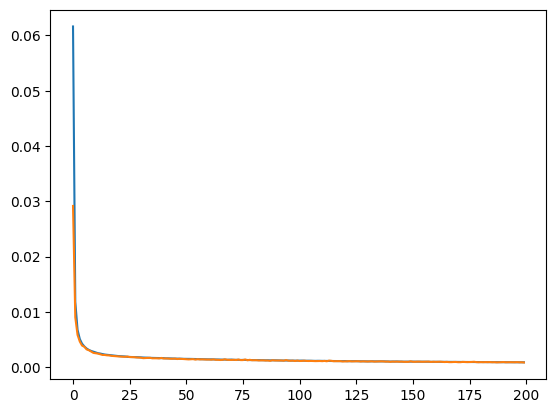

In [7]:
import matplotlib.pyplot as plt
plt.plot(history['loss'])
plt.plot(history['val_loss'])


In [8]:
model.load_state_dict(best_weights)
torch.save(best_weights, '../trained_weights/Resnet_denoiser%d.pt'%(int(10*NOISE_STD)))

/tmp/ipykernel_1506210/2834996088.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t1 = torch.tensor(LR.view(1,1,75,75))


Text(0.5, 1.0, 'Train_Ground truth')

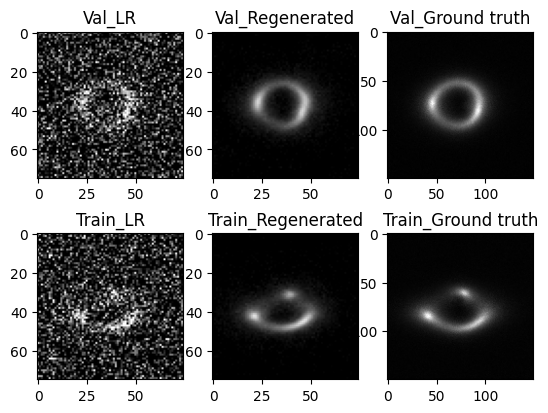

In [9]:
pre, post, tHR = show_random_image(val_dataset, model, 100)
pret, postt, tHRt = show_random_image(train_dataset, model, 900)
plot, axes = plt.subplots(2,3)
axes[0][0].imshow(pre)
axes[0][1].imshow(post)
axes[0][2].imshow(tHR)
axes[0][0].set_title("Val_LR")
axes[0][1].set_title("Val_Regenerated")
axes[0][2].set_title("Val_Ground truth")

axes[1][0].imshow(pret)
axes[1][1].imshow(postt)
axes[1][2].imshow(tHRt)
axes[1][0].set_title("Train_LR")
axes[1][1].set_title("Train_Regenerated")
axes[1][2].set_title("Train_Ground truth")